# Session 7: Introduction to Binary Classification


------------------------------------------------------
*Introduction to Data Science & Machine Learning*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------


Today, we will start with the second block of the course: classification. Like regression, classification is another example of [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning). 

Consider we have a **training** database of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}\in\mathbb{R}^L$ and the label $y$ only belongs to **two possible categories**: $y\in\{0,1\}$. Our goal in classificaiton is to propose an hipothesis function $h(\mathbf{x},y)$ that will be used to estimate the most likely class of a new point $\mathbf{x}^*$ as follows

\begin{align}
y* \approx \arg \max_{y\in\{0,1\}} h(\mathbf{x},y)
\end{align}


Today we will introduce two classification tools:
- K-NN classification 
- Logistic Regression

First, lets import a toy dataset to play with.

### Importing Packages

In [1]:
import numpy as np
import sklearn
import functions    #Some useful functions 
import matplotlib.pyplot as plt
%matplotlib inline



### Loading the database

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

In [3]:
## Dimensions
dims=np.shape(data)
N=dims[0]

## Create X and Y 
X=data[:,0:2]
Y=data[:,2]


### Splitting in training and validation data sets

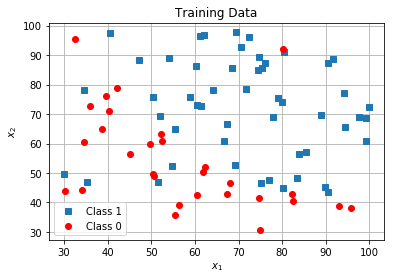

In [4]:
np.random.seed(0)

X_train,X_test,Y_train,Y_test = functions.split_set(X,Y,0.8)



min1=np.min(X[:,0])
max1=np.max(X[:,0])
min2=np.min(X[:,1])
max2=np.max(X[:,1])

## Plot Training Data
index=(Y_train==1)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class 0")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.title('Training Data')


## K-NN Classifier

Lets start with a **nonparametric** classifier. The K-NN classifier is actually very similar to the K-NN regressor, we merely replace the average NN value by a mayority voting scheme. 

Given a new point $\mathbf{x}^*$ the estimated target $y^*$ is computed as follows:

\begin{align}
P(y^*=1|\mathbf{x}^*) \approx \frac{1}{K}\sum_{k\in \mathcal{S}_{K}(\mathbf{x}^*)} \mathbb{I}[y^{(k)}==1],
\end{align}
where $\mathbb{I}[\cdot]$ is the indicator function that takes value $1$ if the condition within the brakets is met, and zero otherwise. Also, $\mathcal{S}_{K}$ is the set of the **$K$ training points that are closest to $\mathbf{x}^*$ according to a given distance metric $d(\mathbf{x}^{(i)},\mathbf{x}^*)$**. For instance, in real spaces the most common choice is the **ecludean distance**:

\begin{align}
d(\mathbf{x}^{(i)},\mathbf{x}^*) = \left|\left|\mathbf{x}^{(i)}-\mathbf{x}^*\right|\right|^2
\end{align}

There are many variants of the above expression. For instance, we can **weight differently the indicator terms according to the distance**. 

Lets use the [*sklearn K-NN classifier implementation*](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in our example.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

K=20

knnc = KNeighborsClassifier(n_neighbors=K)
knnc.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

Lets plot the decision boundary, looking for points with predicted label probability around 0.5

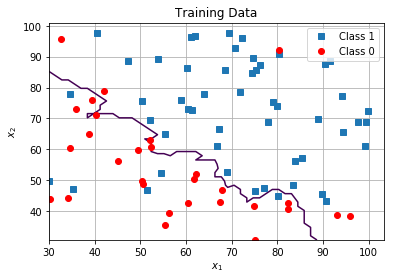

In [15]:
#Plotting the decision boundary
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))
probs = knnc.predict_proba(grid)

## Plot Training Data
index=(Y_train==1)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class 0")
plt.contour(x1,x2,np.reshape(probs[:,0],np.shape(x1)),[0.5])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.title('Training Data')



### Excersise:

Plot in the above figure the validation points and compute the missclassification rate in both training and validation as a function of $K$.

## Logistic Regression

[Logistic Regression](https://onlinecourses.science.psu.edu/stat504/node/149) (LR) is a particular class of **generalized linear model** in which we use a **linear combination of the input features** to adjust the parameter of a particular probability distribution that explains the variable that we want to predict.

Given our **trainin database** of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, imagine that each of the input vectors is transformed to include **additional features** (such as polynomial expansions or any other transformation). We denote the **feature vector** as

\begin{align}
\phi(\mathbf{x}): \mathbb{R}^L \rightarrow \mathbb{R}^D,
\end{align}
where $D\geq L$. In LR, we interpolate the following probabilistic function:
\begin{align}
P(y=1|\phi(\mathbf{x})) =\frac{1}{1+\text{e}^{-\mathbf{\theta}^T\phi(\mathbf{x})}}=\sigma\left(\mathbf{\theta}^T\phi(\mathbf{x})\right),
\end{align}
where $\sigma(\cdot): \mathbb{R}\rightarrow [0,1]$ is the [sigmoid function](http://mathworld.wolfram.com/SigmoidFunction.html).

----

### The cross entropy objective function

While in standard regression the most common loss function is the MSE (mean squared error), in classification with probabilistic ouputs the most common choice is the [**cross entropy loss**](https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/):
\begin{align}
L(\theta)&=\frac{1}{N}\left[-\sum_{i=0}^{N}y^{(i)}\log\left(\sigma(\mathbf{\theta}^T\phi(\mathbf{x}^{(i)})\right)+(1-y^{(i)})\log\left(1-\sigma(\mathbf{\theta}^T\phi(\mathbf{x}^{(i)})\right)\right].
\end{align}
Note that this loss is always positives and grows when $y^{(i)}=1$ and $\sigma(\mathbf{\theta}^T\phi(\mathbf{x}^{(i)})\rightarrow 0$ and viceversa. I.e., penalizes predicted probabilities far from the right label. As in linear regression, we can use $L_2$ or $L_1$ regularization to control overfitting:

\begin{align}
L(\theta,\lambda)&=\frac{1}{N}\left[-\sum_{i=0}^{N}y^{(i)}\log\left(\sigma(\mathbf{\theta}^T\phi(\mathbf{x}^{(i)})\right)+(1-y^{(i)})\left(1-\sigma(\mathbf{\theta}^T\phi(\mathbf{x}^{(i)})\right)+\lambda \mathbf{\theta}^T \mathbf{\theta}\right].
\end{align}

Unlike linear regression with MSE loss, minimizing the cross entropy loss function w.r.t. $\mathbf{\theta}$ **does not have closed form solution**. However, the function is still **convex** and can be easily optimized by **gradient descent**.

----


### The decision boundary in LR

Note that, given the LR predicted class probability
\begin{align}
P(y=1|\phi(\mathbf{x})) =\frac{1}{1+\text{e}^{-\mathbf{\theta}^T\phi(\mathbf{x})}}=\sigma\left(\mathbf{\theta}^T\phi(\mathbf{x})\right),
\end{align}
The decision boundary is computed by all points $\mathbf{x}$ in $\mathbb{R}^L$ such that $P(y=1|\phi(\mathbf{x}))=0.5$ or, equivalently, all points $\mathbf{x}$ in $\mathbb{R}^L$ such that

\begin{align}
\mathbf{\theta}^T\phi(\mathbf{x})=0,
\end{align}

which is the general equation of a [manifold](https://en.wikipedia.org/wiki/Manifold) in $\mathbb{R}^L$. Thus, the decision boundary is completely determined by the features in $\phi(\mathbf{x})$. For instance, consider $\mathbf{x}=[x_1, x_2]$. Then if

- $\phi(\mathbf{x})=[1, x_1, x_2] ~ \Rightarrow ~ \mathbf{\theta}^T\phi(\mathbf{x})=0$ is a straighline in the $\mathbb{R}^2$ space.

- $\phi(\mathbf{x})=[1, x_1, x_2, x_1^2, x_2^2, x_1x_2] ~ \Rightarrow ~ \mathbf{\theta}^T\phi(\mathbf{x})=0$ is an ellipsoid in the $\mathbb{R}^2$ space.


Lets use the [*sklearn LR classifier implementation*](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in our example.

In [7]:
from sklearn.linear_model import LogisticRegression as LR

In [8]:
# C is the inverse of the regularization parameter (C=1/\lambda)
LR_class = LR(C=1e3, penalty='l2', tol=0.01,fit_intercept=True)   

### Example 1: Linear features

$\phi(\mathbf{x})=[1, x_1, x_2]$

In [9]:
X_tnorm,mx,stdx=functions.normalize(X_train,0,1,True)
X_tnorm = functions.add_interfit(X_tnorm)

In [10]:
#Training the LR model with quadratic features
LR_class.fit(X_tnorm, Y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.01, verbose=0, warm_start=False)

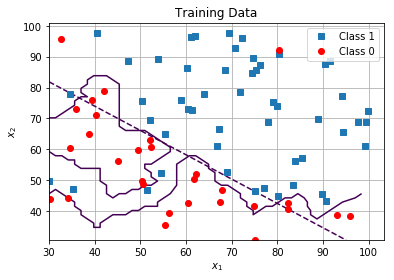

In [11]:
#Plotting the decision boundary
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))
#Normalizing data
grid_norm,_,_=functions.normalize(grid,mx,stdx,False)
grid_norm = functions.add_interfit(grid_norm)

#Estimating class probabilities
probs_LR=LR_class.predict_proba(grid_norm)

## Plot Training Data
index=(Y_train==1)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class 0")
plt.contour(x1,x2,np.reshape(probs[:,0],np.shape(x1)),[0.5])
plt.contour(x1,x2,np.reshape(probs_LR[:,0],np.shape(x1)),[0.5],linestyles='dashed')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.title('Training Data')


In [12]:
# Computing accuracy score

X_testnorm,_,_=functions.normalize(X_test,mx,stdx,False)
X_testnorm = functions.add_interfit(X_testnorm)

print ('Logistic Regression  - Train SCORE: ', LR_class.score(X_tnorm, Y_train))
print ('Logistic Regression  - Test SCORE: ', LR_class.score(X_testnorm, Y_test))

Logistic Regression  - Train SCORE:  0.8375
Logistic Regression  - Test SCORE:  0.894736842105


### Example 2: Quadratic Features

$\phi(\mathbf{x})=[1, x_1, x_2,x_1^2,x_2^2,x_1x_2]$


In [13]:
# C is the inverse of the regularization parameter (C=1/\lambda)
LR_classq = LR(C=1e3, penalty='l2', tol=0.01,fit_intercept=True)   
X_train_ext = np.copy(X_train)
X_train_ext = np.concatenate([X_train,X_train**2,np.reshape(X_train[:,0]*X_train[:,1],[-1,1])],1)
X_tnorm,mx,stdx=functions.normalize(X_train_ext,0,1,True)
X_tnorm = functions.add_interfit(X_tnorm)

X_test_ext = np.copy(X_test)
X_test_ext = np.concatenate([X_test,X_test**2,np.reshape(X_test[:,0]*X_test[:,1],[-1,1])],1)
X_testnorm,_,_=functions.normalize(X_test_ext,mx,stdx,False)
X_testnorm = functions.add_interfit(X_testnorm)

In [14]:
#Training the LR model with quadratic features
LR_classq.fit(X_tnorm, Y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.01, verbose=0, warm_start=False)

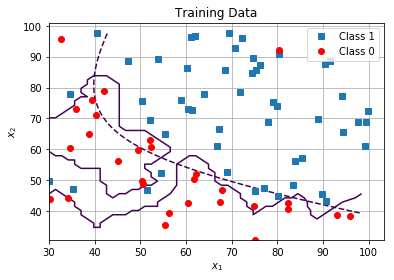

In [15]:
#Plotting the decision boundary
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))
grid_ext = np.concatenate([grid,grid**2,np.reshape(grid[:,0]*grid[:,1],[-1,1])],1)
#Normalizing data
grid_norm,_,_=functions.normalize(grid_ext,mx,stdx,False)
grid_norm = functions.add_interfit(grid_norm)

#Estimating class probabilities
probs_LR=LR_classq.predict_proba(grid_norm)

## Plot Training Data
index=(Y_train==1)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class 0")
plt.contour(x1,x2,np.reshape(probs[:,0],np.shape(x1)),[0.5])
plt.contour(x1,x2,np.reshape(probs_LR[:,0],np.shape(x1)),[0.5],linestyles='dashed')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.title('Training Data')


In [16]:
print ('Logistic Regression  - Train SCORE: ', LR_classq.score(X_tnorm, Y_train))
print ('Logistic Regression  - Test SCORE: ', LR_classq.score(X_testnorm, Y_test))

Logistic Regression  - Train SCORE:  0.85
Logistic Regression  - Test SCORE:  0.894736842105


### Exercise

Compare K-NN and LR for the following database. Compare both LR with linear and nonlinear features.


In [17]:
data = np.loadtxt('ex2data2.txt', delimiter=',')

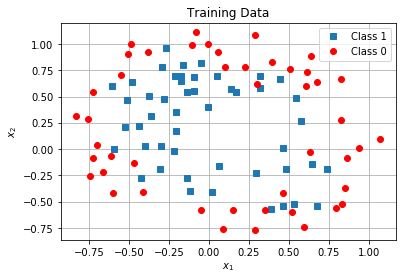

In [18]:
## Dimensions
dims=np.shape(data)
N=dims[0]

## Create X and Y 
X=data[:,0:2]
Y=data[:,2]


### Splitting in training and validation data sets

np.random.seed(0)

X_train,X_test,Y_train,Y_test = functions.split_set(X,Y,0.8)



min1=np.min(X[:,0])
max1=np.max(X[:,0])
min2=np.min(X[:,1])
max2=np.max(X[:,1])

## Plot Training Data
index=(Y_train==1)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class 0")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.title('Training Data')


In [19]:
# Your code here